# Description

One of the biggest challenges when studying data science technical skills is understanding how those skills and concepts translate into real jobs. Whether you're looking to level up in your marketing job by incorporating Python and pandas or you're trying to get a handle on what kinds of work a data scientist in a marketing organization might do, this course is a great match for you. We'll practice translating common business questions into measurable outcomes, including "How did this campaign perform?", "Which channel is referring the most subscribers?", "Why is a particular channel underperforming?" and more using a fake marketing dataset based on the data of an online subscription business. This course will build on Python and pandas fundamentals, such as merging/slicing datasets, groupby(), correcting data types and visualizing results using matplotlib.

# Pandas

In [2]:
import pandas as pd
marketing = pd.read_csv('marketing.csv')
print(marketing.head())

      user_id date_served marketing_channel          variant converted  \
0  a100000029      1/1/18         House Ads  personalization      True   
1  a100000030      1/1/18         House Ads  personalization      True   
2  a100000031      1/1/18         House Ads  personalization      True   
3  a100000032      1/1/18         House Ads  personalization      True   
4  a100000033      1/1/18         House Ads  personalization      True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English   0-18 years          1/1/18   
1            English            English  19-24 years          1/1/18   
2            English            English  24-30 years          1/1/18   
3            English            English  30-36 years          1/1/18   
4            English            English  36-45 years          1/1/18   

  date_canceled subscribing_channel is_retained  
0           NaN           House Ads        True  
1           NaN       

In [3]:
# Check the data type of is_retained
print(marketing['is_retained'].dtype)

object


### Adding new columns

Adding new columns that derive information from existing data or based on domain knowledge is known as Feature Engineering. Even in relatively simple datasets, there are always new characteristics you could pull out to create a more in-depth analysis.

One of the most critical skills a data scientist needs to learn is how to identify opportunities for feature engineering.

In [11]:
# Mapping for channels
channel_dict = {"House Ads": 1, "Instagram": 2, 
                "Facebook": 3, "Email": 4, "Push": 5}

# Map the channel to a channel code
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)
marketing

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW,channel_code
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,0.0,1.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,0.0,1.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,0.0,1.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,0.0,1.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a100007290,2018-01-17,Email,control,True,German,German,45-55 years,2018-01-17,2018-01-24,Email,False,2.0,4.0
10033,a100007291,2018-01-17,Email,control,True,German,German,55+ years,2018-01-17,NaT,Email,True,2.0,4.0
10034,a100007292,2018-01-05,Instagram,control,False,German,German,55+ years,2018-01-17,NaT,Email,True,2.0,4.0
10035,a100007293,2018-01-17,Email,control,True,German,German,0-18 years,2018-01-17,NaT,Email,True,2.0,4.0


### Date columns

Currently, the date columns in the marketing DataFrame are being incorrectly read as objects. We need to convert these columns to date columns to be able to use Python and pandas' robust date manipulation and formatting capabilities.

In [14]:
# Import marketing.csv with date columns
marketing = pd.read_csv('marketing.csv', 
                        parse_dates = ['date_served', 'date_subscribed', 'date_canceled'])

# Add a DoW column
marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek

# Adding channel code again
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)
marketing

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,0.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,0.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,0.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,0.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a100007290,2018-01-17,Email,control,True,German,German,45-55 years,2018-01-17,2018-01-24,Email,False,2.0
10033,a100007291,2018-01-17,Email,control,True,German,German,55+ years,2018-01-17,NaT,Email,True,2.0
10034,a100007292,2018-01-05,Instagram,control,False,German,German,55+ years,2018-01-17,NaT,Email,True,2.0
10035,a100007293,2018-01-17,Email,control,True,German,German,0-18 years,2018-01-17,NaT,Email,True,2.0


### Daily marketing reach by channel

In this exercise, you'll determine how many users are seeing the marketing assets each day. This is crucial to understand how effective our marketing efforts have been over the past month.

In [15]:
# Group by date_served and count number of unique user_id's
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()

# Print head of daily_users
print(daily_users.head())

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64


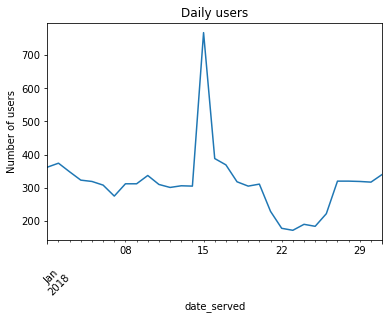

In [18]:
import matplotlib.pyplot as plt
# Plot daily_subscribers
daily_users.plot()

# Include a title and y-axis label
plt.title('Daily users')
plt.ylabel('Number of users')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Exploratory Analysis and Summary Statistics

## Calculating conversion rate

In this exercise, you will practice calculating conversion rate, which is often the first metric you'll want to calculate when evaluating how a marketing campaign performed.

On marketing teams, conversion rate is typically the most important metric. It is one of the best ways to determine how effective a marketing team was at gaining new customers.

As a reminder, conversion rate is the percentage of the users who saw our marketing assets and subsequently became subscribers.

In [20]:
# Calculate the number of people we marketed to
total = marketing['user_id'].nunique()

# Calculate the number of people who subscribed
subscribers = marketing[marketing["converted"] == True]['user_id'].nunique()

# Calculate the conversion rate
conversion_rate = subscribers/total
print(round(conversion_rate*100, 2), "%")

13.89 %


## Calculating retention rate

In this exercise, you will calculate the retention rate, or the number of remaining subscribers from the users who converted to your product. This can give you a sense of whether your marketing campaign converted subscribers who were actually interested in the product.

Conversion rate and retention rate function hand-in-hand; you could create a business with a high conversion rate by giving users a free trial, but have a low retention rate once users are charged for your services. This isn't inherently a bad thing, but it is important to provide your business stakeholders with insight into what percentage of users remain subscribers.

In [24]:
# Calculate the number of subscribers
total_subscribers = marketing[marketing["converted"] == True]\
                            ['user_id'].nunique()

# Calculate the number of people who remained subscribed
retained = marketing[marketing['is_retained'] == True]\
                   ['user_id'].nunique()

# Calculate the retention rate
retention_rate = retained/total_subscribers
print(round(retention_rate*100, 2), "%")

66.8 %


## Comparing language conversion rate (I)

The marketing team wants to determine how effective the campaign was on converting English speakers.

In this exercise, you will isolate the data for English speakers and calculate the conversion rate much like in the previous exercises. Once you have the conversion rate for English speakers, you can compare it to the overall conversion rate to gain a sense of how effective the marketing campaign was among this group compared to the overall population.

In [25]:
# Isolate english speakers
english_speakers = marketing[marketing['language_displayed'] == 'English']

# Calculate the total number of english speaking users
total = english_speakers['user_id'].nunique()

# Calculate the number of english speakers who converted
subscribers = english_speakers[english_speakers['converted'] == True]\
                            ['user_id'].nunique()

# Calculate conversion rate
conversion_rate = subscribers/total
print('English speaker conversion rate:',  round(conversion_rate*100,2), '%')

English speaker conversion rate: 12.92 %


## Comparing language conversion rate (II)

Next, you want to look at the conversion rate by the language that the marketing asset was shown in. While many of your users speak English, some prefer another language. Let's check to make sure marketing material translated well across languages.

You can analyze metrics by specific demographics using .groupby(). Rather than looking at the overall conversion rate in the dataset, you instead group by language preference, which allows you to determine whether the marketing campaign was more effective in certain languages.

In [26]:
# Group by language_displayed and count unique users
total = marketing.groupby(['language_displayed'])\
                                  ['user_id'].nunique()

# Group by language_displayed and count unique conversions
subscribers = marketing[marketing['converted'] == True]\
                       .groupby(['language_displayed'])\
                       ['user_id'].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = subscribers/total
print(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.129167
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


## Aggregating by date

The marketing team wants to know whether there is any difference in the conversion rate based on when in the month, your users saw an ad. In this exercise, you will practice .groupby() again, this time looking at how metrics have evolved.

In [27]:
# Group by date_served and count unique users
total = marketing.groupby(['date_served'])['user_id']\
                     .nunique()

# Group by date_served and count unique converted users
subscribers = marketing[marketing['converted'] == True]\
                         .groupby(['date_served'])\
                         ['user_id'].nunique()

# Calculate the conversion rate per day
daily_conversion_rate = subscribers/total
print(daily_conversion_rate)

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64


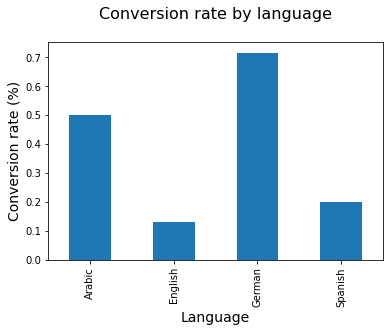

In [28]:
# Create a bar chart using language_conversion_rate DataFrame
language_conversion_rate.plot(kind='bar')

# Add a title and x and y-axis labels
plt.title('Conversion rate by language\n', size = 16)
plt.xlabel('Language', size = 14)
plt.ylabel('Conversion rate (%)', size = 14)

# Display the plot
plt.show()

### Creating daily conversion rate DataFrame

To understand trends over time, you will create a new DataFrame that includes the conversion rate each day. You will follow essentially the same steps as before when you calculated the overall conversion rate, this time also grouping by the date a user subscribed.

Looking at the daily conversion rate is crucial to contextualize whether the conversion rate on a particular day was good or bad. Additionally, looking at conversion rate over time can help to surface trends such as a conversion rate that appears to be going down over time. These kinds of trends are crucial to identify for your marketing stakeholders as early as possible.

In [30]:
# Group by date_served and count unique users
total = marketing.groupby(['date_served'])['user_id']\
                     .nunique()

# Group by date_served and calculate subscribers
subscribers = marketing[marketing['converted'] == True]\
                         .groupby(['date_served'])\
                         ['user_id'].nunique()

# Calculate the conversion rate for all languages
daily_conversion_rates = subscribers/total
daily_conversion_rates

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64

In [31]:
# Reset index to turn the results into a DataFrame
daily_conversion_rate = pd.DataFrame(daily_conversion_rates.reset_index(0))

# Rename columns
daily_conversion_rate.columns = ['date_served', 
                                 'conversion_rate']

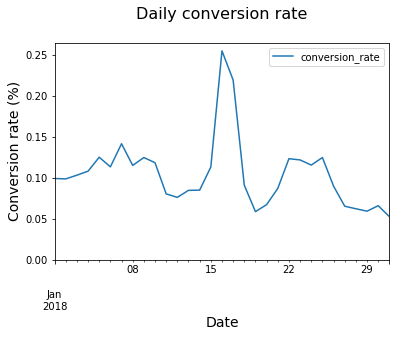

In [33]:
# Create a line chart using daily_conversion_rate DataFrame
daily_conversion_rate.plot('date_served', 
                           'conversion_rate')

plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)

# Set the y-axis to begin at 0
plt.ylim(0)

# Display the plot
plt.show()

## Marketing channels across age groups

Some marketing stakeholders want to know if their marketing channels are reaching all users equally or if some marketing channels are serving specific age demographics.

Within a marketing team, it is common to get requests that require quick analysis and visualization. The better you are at visualizing the results, the more likely that you will effectively communicate your findings to your stakeholders.

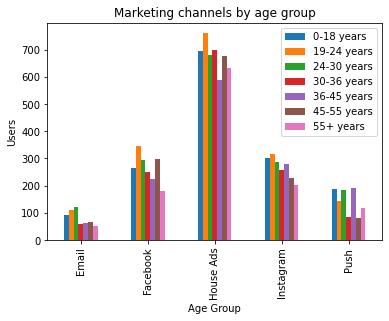

In [34]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])\
                                ['user_id'].count()

# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))

# Plot the results
channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
# Add a legend to the plot
plt.legend(loc = 'upper right', 
           labels = channel_age_df.columns.values)
plt.show()

## Grouping and counting by multiple columns

Stakeholders have begun competing to see whose channel had the best retention rate from the campaign. You must first determine how many subscribers came from the campaign and how many of those subscribers have stayed on the service.

It's important to identify how each marketing channel is performing because this will affect company strategy going forward. If one channel is outperforming others, it might signal the channel merits further investment.

In [37]:
# Count the retained subs by subscribing channel and date subscribed
retention_subs = marketing[marketing['is_retained'] == True]\
                           .groupby(['date_subscribed',
                                     'subscribing_channel'])\
                            ['user_id'].nunique()

# Print results
print(retention_subs.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
Name: user_id, dtype: int64


In [35]:
# Count the subs by subscribing channel and date subscribed
retention_total = marketing.groupby(['date_subscribed',
                                     'subscribing_channel'])\
                                       ['user_id'].nunique()

# Print results
print(retention_total.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
Name: user_id, dtype: int64


## Analyzing retention rates for the campaign

Now that you've calculated the total subscribers and retained subscribers, you can settle the question of which channel had the highest retention rate.

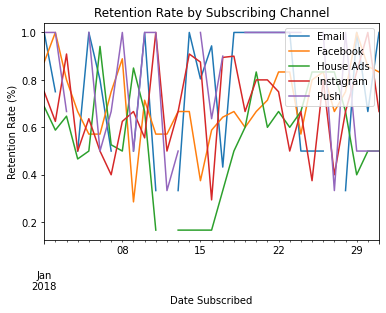

In [38]:
# Divide retained subscribers by total subscribers
retention_rate = retention_subs/retention_total
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))

# Plot retention rate
retention_rate_df.plot()

# Add a title, x-label, y-label, legend and display the plot
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate (%)')
plt.legend(loc = 'upper right', 
           labels = retention_rate_df.columns.values)
plt.show()

# Conversion Attibution